In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

**Objective and goal for this lab**

For this lab, we're going to see how we can transform images to a format we're used to working with, and can thus use for training classification (or regression) models.

We will be using the MNIST-dataset, which is a famous dataset of handwritten black & white digits between 0-9. Our goal will be to train a classifier to correctly classify each image as the digit it portrays.

You can read more about MNIST [here](https://en.wikipedia.org/wiki/MNIST_database).

---

Install the MNIST-package

In [2]:
!pip install mnist

**Load the data**

In [3]:
import mnist

train_images, train_labels = mnist.train_images(), mnist.train_labels()

test_images, test_labels = mnist.test_images(), mnist.test_labels()

Let's investigate what we just loaded

In [4]:
print('train_images shape :', train_images.shape)
print('test_images shape  :', test_images.shape, end='\n\n')

print('train_labels shape :', train_labels.shape)
print('test_labels shape  :', test_labels.shape)

train_images shape : (60000, 28, 28)
test_images shape  : (10000, 28, 28)

train_labels shape : (60000,)
test_labels shape  : (10000,)


So both train and test images are 3D-arrays. Let's pick the first item in train_images and investigate it

In [5]:
print('train_images[0] :', train_images[0].shape)

train_images[0] : (28, 28)


So, the first (out of 60.000) items in train_images is a 28x28 array. Actually, it's an image of size 28x28 pixels.

We can visualise this easily

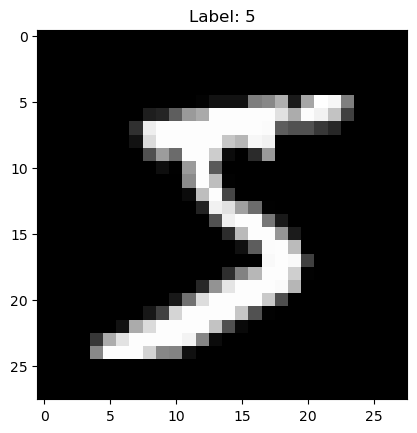

In [6]:
plt.imshow(train_images[0], cmap='gray');
plt.title(f'Label: {train_labels[0]}')
plt.show()

As you might've noticed, the train_labels contain the true labels (i.e., the targets) for each handwritten image.

Let's plot some more images

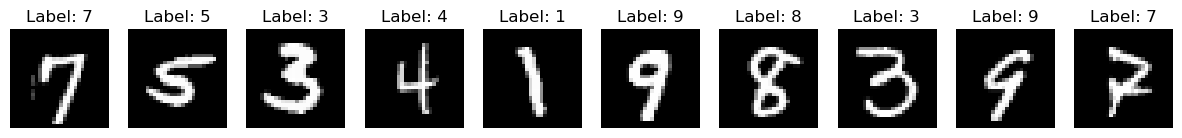

In [11]:
import random

number_of_images = 10

indices = random.sample(range(60000), number_of_images)

fig, axes = plt.subplots(1, number_of_images, figsize=(15, 3))

for idx, ax in zip(indices, axes):
    ax.imshow(train_images[idx], cmap='gray')
    ax.set_title(f'Label: {train_labels[idx]}')
    ax.axis('off')

plt.show()

In [14]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

---

Ok, so how do we transform this data into a format that we can train the models we've learnt about thus far? 

Well,  what we'll do is that we're going to use *every pixel as it's own feature*. Since each image is 28x28 pixels, we're going to have 28x28 = 784 features for each image.

We can use flatten() to transform a 2D (28,28) shaped array to a single 1D (784) array.

In [15]:
# easy transformation

train_images[0].flatten().shape

(784,)

In [16]:
# now we do it for all the images in the train_images

train_images_flattened = [list(image.flatten()) for image in train_images]

In [17]:
train_images_flattened_array = np.array([image.flatten() for image in train_images])

# transform that list to a dataframe so that we can see what's going on
X_train_val = pd.DataFrame(train_images_flattened_array)

X_train_val


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X_train_val.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [19]:
# might aswell make the labels into a dataframe too

y_train_val = pd.DataFrame(train_labels)

y_train_val

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [20]:
y_train_val.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

Cool, no we're on familiar ground! We have our X_train_val (features) and y_train_val (targets) in a suitable format.

Now we can try training some multiclass classification models on this data!

---

## Challenges

**Task 1**

Transform test_images and test_labels similarly as above, and save them as X_test and y_test.

This is the test set you will use at the end, to assess final performance!

In [21]:
# now we do it for all the images in the test_images

test_images_flattened = [list(image.flatten()) for image in test_images]

test_images_flattened_array = np.array([image.flatten() for image in test_images])

# transform that list to a dataframe so that we can see what's going on
X_test = pd.DataFrame(test_images_flattened_array)

X_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y_test = pd.DataFrame(test_labels)

y_test

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


**Task 1.5 (bonus**)

Let's normalize our features! Because why not. It won't hurt the algorithms that don't require it - and we might aswell show how easily images can be scaled properly.

In the case for gray-scale images, we simply divide all features (pixels) by 255. Why? Because that's the maximum possible value. This will bring all grayscale values to the range [0,1].

In [23]:
X_train_val = X_train_val/255

X_test = X_test/255

In [24]:
X_train_val.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000786,0.000348,0.000179,0.000076,0.000059,0.000008,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023696,0.015514,0.011137,0.006615,0.006582,0.001359,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


Awesome. Done. Feel free to check that all grayscale values are properly scaled.

**Task 2**

Using all 784 features (no additional feature engineering or manipulation needed), start GridSearching for the best performing hyperparameters for 

KNN, DecisionTree, RandomForest, AdaBoost 

**Task 3**

When you have the best performing hyperparameters, do an ordinary train/validation split on X_train_val and y_train_val.

Train the models with their respective best performing hyperparameters on X_train and then evaluate performance on X_val.

In particular, make good use of confusion matrices here.

**Task 4**

For the models you've trained in Task 3, try plotting the validation samples they classified **incorrectly**. As the title for each image, write the true label and the predicted label.

Do the mistakes kinda make sense? Can you forgive your models? :)

**Task 5**

For each model with the identified best performing hyperparameters, do a full training on X_train_val - then assess performance on X_test.

Which model did you find to perform worst/best? Is the difference large?

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

*We're going to pretend that the default hyperparameters are best here...*

Train and predict with KNN

In [42]:
knn = KNeighborsClassifier()
knn.fit(X_train_val, y_train_val)

c:\Users\Leyla\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [43]:
knn_pred = knn.predict(X_test)

In [45]:
knn_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [47]:
knn_pred_probabilities = knn.predict_proba(X_test)

Train and predict with RF

In [48]:
rf = RandomForestClassifier()
rf.fit(X_train_val, y_train_val)

C:\Users\Leyla\AppData\Local\Temp\ipykernel_63940\2746540101.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_val, y_train_val)


RandomForestClassifier()

In [49]:
rf_pred = rf.predict(X_test)

In [50]:
rf_pred_probabilities = rf.predict_proba(X_test)

Evaluate KNN

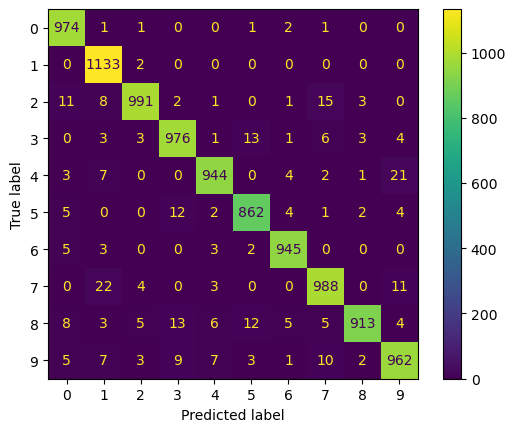

In [51]:
cm = confusion_matrix(y_true=y_test, y_pred=knn_pred.reshape(-1,1))

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

cm_display.plot()
plt.show() 

In [52]:
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy:", accuracy, end='\n\n')

report = classification_report(y_test, knn_pred)
print("Classification Report:\n", report)

Accuracy: 0.9688

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Evaluate RF

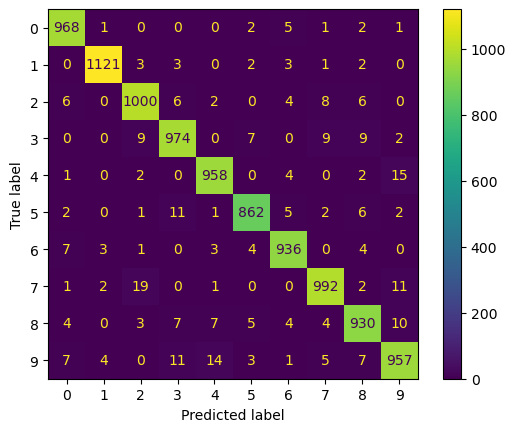

In [53]:
cm = confusion_matrix(y_true=y_test, y_pred=rf_pred.reshape(-1,1))

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

cm_display.plot()
plt.show() 

In [54]:
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy, end='\n\n')

report = classification_report(y_test, rf_pred)
print("Classification Report:\n", report)

Accuracy: 0.9698

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Let's plot missclassifcations made by the RF, for some error analysis

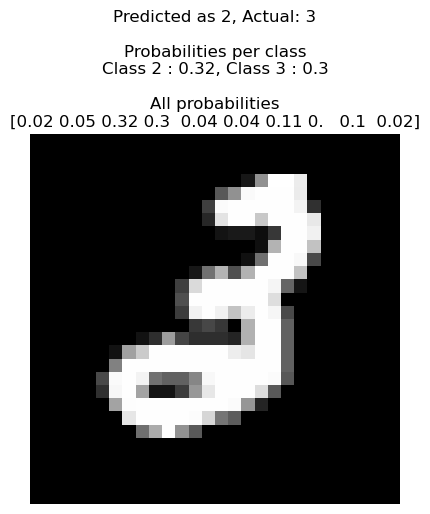

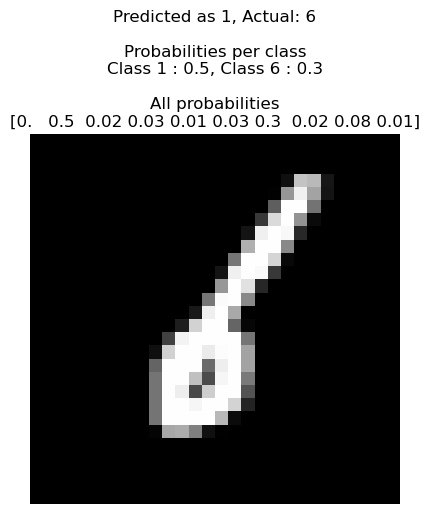

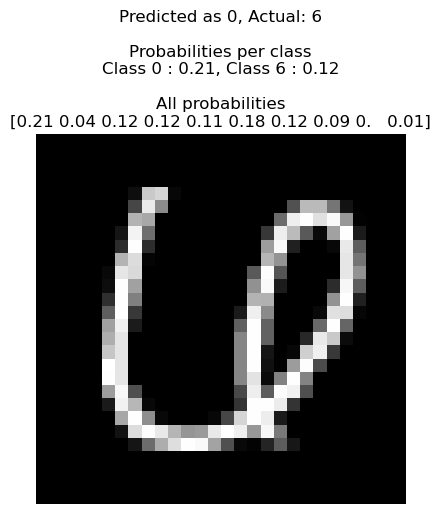

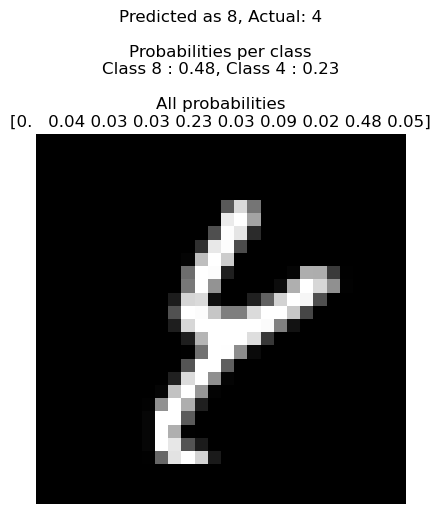

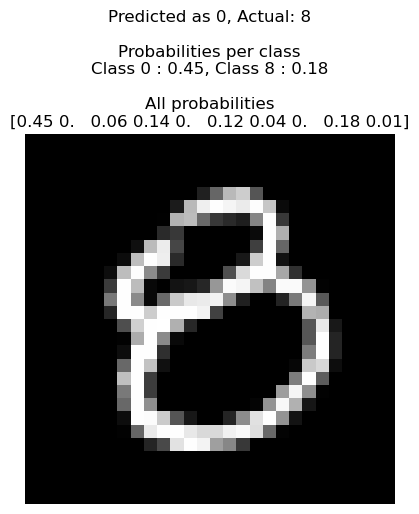

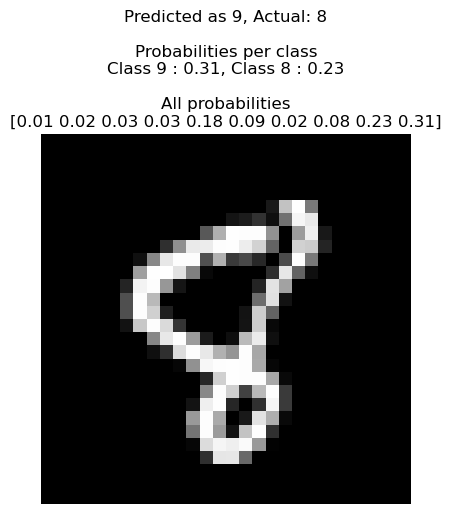

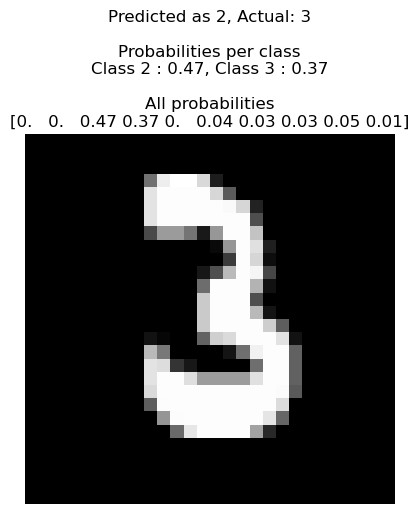

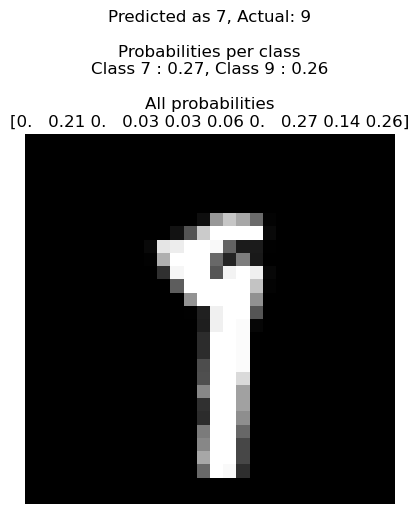

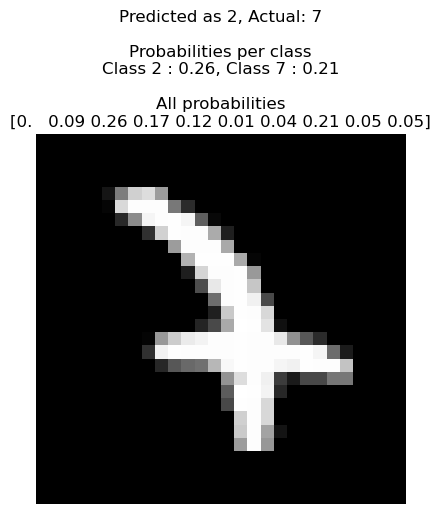

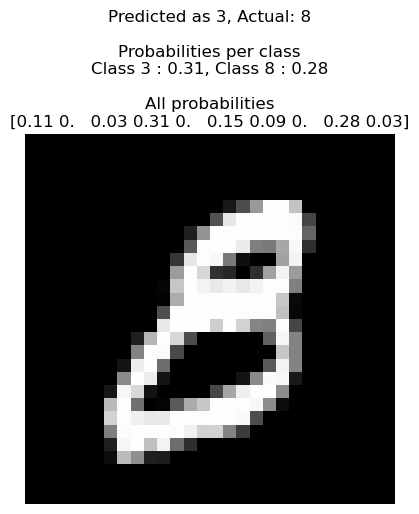

In [59]:
misclassified_indices = np.where(rf_pred != y_test.values.ravel())[0]

np.random.shuffle(misclassified_indices)

num_images_to_display = 10

num_displayed = 0

for i in misclassified_indices:
    if num_displayed >= num_images_to_display:
        break

    predicted_class = rf_pred[i]
    correct_class = y_test.values.ravel()[i]

    predicted_class_probability = rf_pred_probabilities[i][predicted_class]
    correct_class_probability = rf_pred_probabilities[i][correct_class]
    
    plt.figure()
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted as {predicted_class}, Actual: {correct_class}\n\n"
              f"Probabilities per class\n" 
              f"Class {predicted_class} : {predicted_class_probability}, Class {correct_class} : {correct_class_probability}\n\n"
              'All probabilities\n'
              f"{rf_pred_probabilities[i]}")
    plt.axis('off')
    plt.show()
    
    num_displayed += 1

**Task 6**

If you feel frisky, you can try a tad more difficult problem. Try loading and training on the [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) dataset instead. 

It's a relatively more difficult dataset to classify.